<a href="https://colab.research.google.com/github/gabriela-du/challenge02/blob/main/challenge02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [2]:
import pandas as pd

In [7]:
dados = pd.read_json('/TelecomX_Data (1).json')

In [8]:
dados

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

#üîß Transforma√ß√£o

In [22]:
# Normalizando campos aninhados
df = pd.json_normalize(dados.to_dict(orient="records"))

# Visualizar primeiras linhas
print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [15]:
df_normalizado_cliente = pd.json_normalize(dados['customer'])
df_normalizado_cliente

gender  SeniorCitizen Partner Dependents  tenure
0     Female              0     Yes        Yes       9
1       Male              0      No         No       9
2       Male              0      No         No       4
3       Male              1     Yes         No      13
4     Female              1     Yes         No       3
...      ...            ...     ...        ...     ...
7262  Female              0      No         No      13
7263    Male              0     Yes         No      22
7264    Male              0      No         No       2
7265    Male              0     Yes        Yes      67
7266    Male              0     Yes        Yes      63

[7267 rows x 5 columns]

In [16]:
df_normalizado_phone = pd.json_normalize(dados['phone'])
df_normalizado_phone

PhoneService     MultipleLines
0             Yes                No
1             Yes               Yes
2             Yes                No
3             Yes                No
4             Yes                No
...           ...               ...
7262          Yes                No
7263          Yes               Yes
7264          Yes                No
7265          Yes                No
7266           No  No phone service

[7267 rows x 2 columns]

In [17]:
df_normalizado_internet = pd.json_normalize(dados['internet'])
df_normalizado_internet

InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No         Yes   
1                DSL             No           No               No          No   
2        Fiber optic             No           No              Yes          No   
3        Fiber optic             No          Yes              Yes          No   
4        Fiber optic             No           No               No         Yes   
...              ...            ...          ...              ...         ...   
7262             DSL            Yes           No               No         Yes   
7263     Fiber optic             No           No               No          No   
7264             DSL             No          Yes               No          No   
7265             DSL            Yes           No              Yes         Yes   
7266             DSL            Yes          Yes              Yes          No   

     StreamingTV StreamingMovies  
0            Yes              No  
1             No             Yes  
2             No              No  
3            Yes             Yes  
4            Yes              No  
...          ...             ...  
7262          No              No  
7263          No             Yes  
7264          No              No  
7265          No             Yes  
7266         Yes             Yes  

[7267 rows x 7 columns]

In [18]:
df_normalizado_account = pd.json_normalize(dados['account'])
df_normalizado_account

Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0           One year              Yes      Mailed check            65.60   
1     Month-to-month               No      Mailed check            59.90   
2     Month-to-month              Yes  Electronic check            73.90   
3     Month-to-month              Yes  Electronic check            98.00   
4     Month-to-month              Yes      Mailed check            83.90   
...              ...              ...               ...              ...   
7262        One year               No      Mailed check            55.15   
7263  Month-to-month              Yes  Electronic check            85.10   
7264  Month-to-month              Yes      Mailed check            50.30   
7265        Two year               No      Mailed check            67.85   
7266        Two year               No  Electronic check            59.00   

     Charges.Total  
0            593.3  
1            542.4  
2           280.85  
3          1237.85  
4            267.4  
...            ...  
7262         742.9  
7263        1873.7  
7264         92.75  
7265       4627.65  
7266        3707.6  

[7267 rows x 5 columns]

#üìä Carga e an√°lise

In [23]:
import numpy as np

# Estat√≠sticas b√°sicas das colunas num√©ricas
desc = df.describe().T
print(desc[['mean', '50%', 'std']])  # 50% √© a mediana

                              mean   50%        std
customer.SeniorCitizen    0.162653   0.0   0.369074
customer.tenure          32.346498  29.0  24.571773
account.Charges.Monthly  64.720098  70.3  30.129572


In [26]:
print("M√©dia gasto mensal:", df["account.Charges.Monthly"].mean())
print("Mediana gasto mensal:", df["account.Charges.Monthly"].median())
print("Desvio padr√£o gasto mensal:", df["account.Charges.Monthly"].std())

print("\nM√©dia tempo de perman√™ncia:", df["customer.tenure"].mean())
print("Mediana tempo de perman√™ncia:", df["customer.tenure"].median())
print("Desvio padr√£o tempo de perman√™ncia:", df["customer.tenure"].std())

M√©dia gasto mensal: 64.72009770194028
Mediana gasto mensal: 70.3
Desvio padr√£o gasto mensal: 30.12957188566699

M√©dia tempo de perman√™ncia: 32.34649786707032
Mediana tempo de perman√™ncia: 29.0
Desvio padr√£o tempo de perman√™ncia: 24.571772888767292


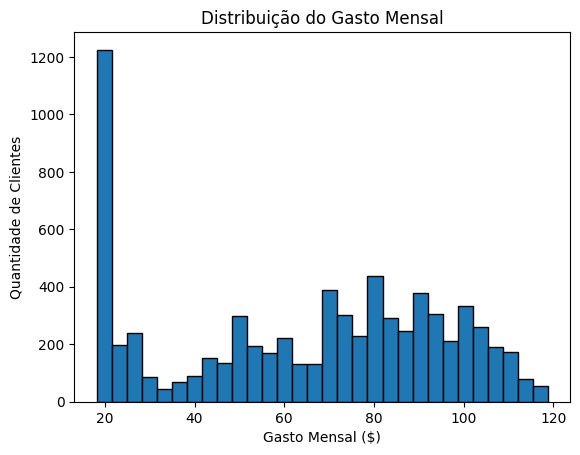

In [27]:
import matplotlib.pyplot as plt

plt.hist(df["account.Charges.Monthly"], bins=30, edgecolor='black')
plt.title("Distribui√ß√£o do Gasto Mensal")
plt.xlabel("Gasto Mensal ($)")
plt.ylabel("Quantidade de Clientes")
plt.show()

In [28]:
import matplotlib.pyplot as plt

# Contagem de clientes por Churn
churn_counts = df["Churn"].value_counts()

print(churn_counts)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


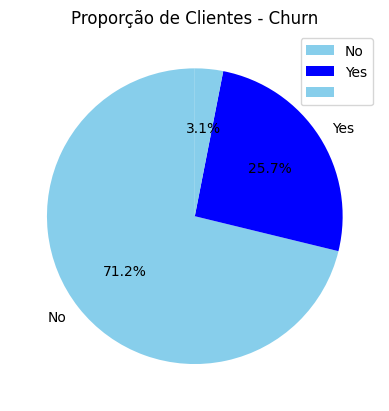

In [34]:
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'blue'],
                  startangle=90, legend=True)
plt.ylabel("")
plt.title("Propor√ß√£o de Clientes - Churn")
plt.show()

In [31]:
#churn por g√™nero
print(pd.crosstab(df['customer.gender'], df['Churn'], normalize='index') * 100)

# churn por tipo de contrato
print(pd.crosstab(df['account.Contract'], df['Churn'], normalize='index') * 100)

# churn por m√©todo de pagamento
print(pd.crosstab(df['account.PaymentMethod'], df['Churn'], normalize='index') * 100)

Churn                             No        Yes
customer.gender                                
Female           2.895323  70.963252  26.141425
Male             3.265306  71.428571  25.306122
Churn                              No        Yes
account.Contract                                
Month-to-month    3.245943  55.430712  41.323346
One year          3.028308  86.043450  10.928242
Two year          2.753873  94.492255   2.753873
Churn                                       No        Yes
account.PaymentMethod                                    
Bank transfer (automatic)  2.831970  80.931403  16.236627
Credit card (automatic)    2.933673  82.270408  14.795918
Electronic check           3.271984  52.924335  43.803681
Mailed check               3.183183  78.318318  18.498498


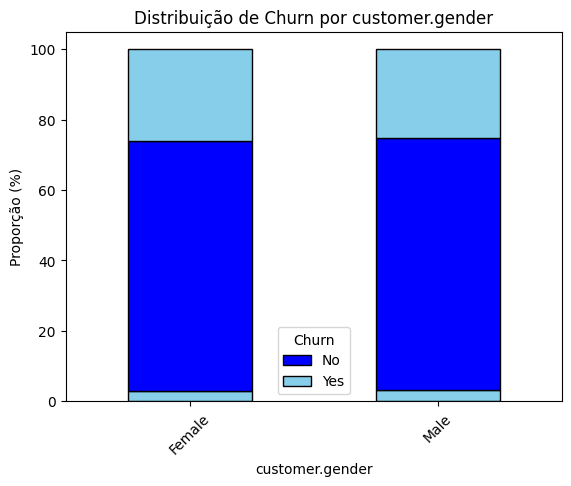

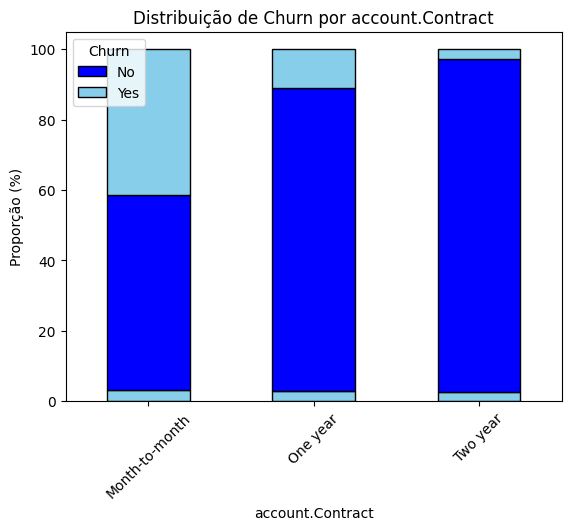

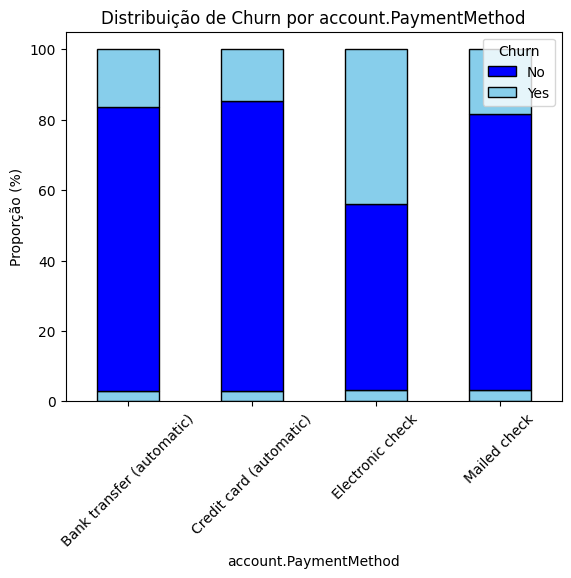

In [33]:
#Gr√°fico
def churn_plot(col):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['skyblue','blue'], edgecolor="black")
    plt.title(f"Distribui√ß√£o de Churn por {col}")
    plt.ylabel("Propor√ß√£o (%)")
    plt.xlabel(col)
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.show()

# Exemplos:
churn_plot('customer.gender')
churn_plot('account.Contract')
churn_plot('account.PaymentMethod')

In [35]:
# Estat√≠sticas por churn
num_vars = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total"]

for col in num_vars:
    print(f"\nüìä {col}")
    print(df.groupby("Churn")[col].describe())


üìä customer.tenure
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

üìä account.Charges.Monthly
        count       mean        std    min     25%     50%      75%     max
Churn                                                                      
        224.0  63.412277  31.388712  18.75  28.425  69.100  90.4125  115.55
No     5174.0  61.265124  31.092648  18.25  25.100  64.425  88.4000  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.150  79.650  94.2000  118.35

üìä account.Charges.Total
      count unique    top freq
Churn                         
        224    223  19.55    2
No     5174   4966          11
Yes    1869   1732   20.2    6


In [38]:
import seaborn as sns

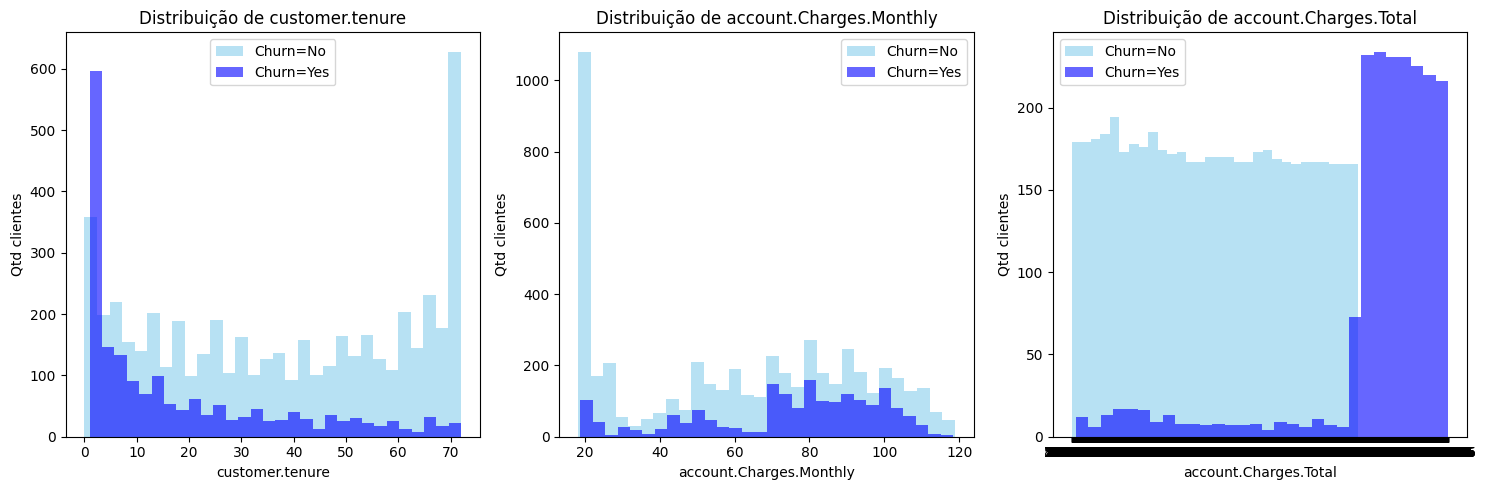

In [40]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    for churn_value, color in zip(["No", "Yes"], ["skyblue", "blue"]):
        subset = df[df["Churn"] == churn_value]
        plt.hist(subset[col], bins=30, alpha=0.6, label=f"Churn={churn_value}", color=color)
    plt.title(f"Distribui√ß√£o de {col}")
    plt.xlabel(col)
    plt.ylabel("Qtd clientes")
    plt.legend()

plt.tight_layout()
plt.show()

#üìÑRelatorio Final

#**Relat√≥rio de An√°lise de Evas√£o de Clientes (Churn)**
#**1. Introdu√ß√£o**

O objetivo desta an√°lise √© compreender os fatores associados √† evas√£o de clientes (Churn) em uma empresa de telecomunica√ß√µes.
A evas√£o de clientes √© um problema cr√≠tico, pois impacta diretamente na receita e na sustentabilidade do neg√≥cio.
Por meio da explora√ß√£o dos dados fornecidos em formato JSON, buscamos identificar padr√µes de comportamento e vari√°veis que influenciam a perman√™ncia ou sa√≠da dos clientes.

# **2. Limpeza e Tratamento de Dados**

Os dados foram importados a partir de um arquivo JSON (TelecomX_Data.json).

Utilizamos pandas.json_normalize para transformar os campos aninhados em colunas planas, facilitando a an√°lise.

Vari√°veis num√©ricas e categ√≥ricas foram organizadas em colunas como:

Num√©ricas: customer.tenure, account.Charges.Monthly, account.Charges.Total

Categ√≥ricas: customer.gender, account.Contract, account.PaymentMethod

Foram realizadas verifica√ß√µes de consist√™ncia e tratamento para lidar com formatos de vari√°veis.

# **3. An√°lise Explorat√≥ria de Dados**

**3.1. Distribui√ß√£o Geral de Churn**

Contagem de clientes:

1. N√£o evadiram: 5.174

2. Evadiram: 1.869

**3.2. Vari√°veis Num√©ricas**

Tempo de perman√™ncia (tenure):

1. M√©dia clientes ativos: 37,6 meses

2. M√©dia clientes evadidos: 18 meses

Gasto mensal:

Clientes evadidos apresentam gasto m√©dio maior (74,4) em compara√ß√£o aos que ficaram (61,2).

Gasto total:

Clientes evadidos acumulam valores menores, pois tendem a sair antes.

**3.3. Vari√°veis Categ√≥ricas**

Churn por g√™nero: distribui√ß√£o equilibrada.

Churn por contrato:

1. Month-to-month ‚Üí 41% evas√£o

2. One year ‚Üí 11% evas√£o

3. Two year ‚Üí apenas 2,7% evas√£o

Churn por m√©todo de pagamento:

1. Electronic check ‚Üí maior evas√£o (43,8%)

2. Cart√£o autom√°tico / d√©bito autom√°tico ‚Üí menor evas√£o (‚âà15%).


# **4. Conclus√µes e Insights**

Clientes de contrato mensal e que usam Electronic check apresentam maior risco de evas√£o.

Tempo de perman√™ncia √© um indicador chave: clientes com baixa fidelidade (menor que 12 meses) t√™m maior probabilidade de cancelar.

Clientes com gasto mensal elevado est√£o mais propensos a sair, possivelmente por perceberem o servi√ßo como caro.

O gasto total acumulado dos evadidos √© menor, refor√ßando que o cancelamento ocorre de forma precoce.

# **Recomenda√ß√µes Estrat√©gicas**

1. Oferecer incentivos para migra√ß√£o de contratos mensais para anuais/bianuais, reduzindo a probabilidade de cancelamento.

2. Revisar pre√ßos para clientes de alto gasto mensal, oferecendo pacotes personalizados ou descontos para evitar evas√£o.

3. Aprimorar a experi√™ncia de pagamento digital: clientes que usam ‚ÄúElectronic check‚Äù possuem maior churn; estimular meios autom√°ticos de pagamento pode aumentar a reten√ß√£o.

4. Programas de fidelidade voltados para clientes novos, j√° que o risco de evas√£o √© maior nos primeiros meses de contrato.

5. Monitoramento cont√≠nuo com dashboards de churn, permitindo a√ß√£o r√°pida quando padr√µes de risco surgirem.
